# Arboles de Decision y Bosques Aleatorios
**Decision Trees and Random Forests**

Cuaderno original proporcionado por UNIR en la materia de Aprendizaje Automático para la Maestria en Inteligencia Artificial. Mejoras por @AmadeusCelta.

## Librerías utilizadas

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [23]:
# Utilizaremos esta semilla para los arboles y bosques, por medio del parámetro random_state
semilla_aleatoria = 1234

## 1. Leer los datos del archivo pima-indians-diabetes.csv

In [24]:
# Leer el archivo csv en un Dataframe
df_base=pd.read_csv("pima-indians-diabetes.csv")

# Mostramos los primeros 10 registros del Dataframe (El display no es necesario para mostrarlos)
# display(df_base.head(10))
df_base.head(10)

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [25]:
# Dimensiones del Dataframe (Registros, Campos)
df_base.shape

(768, 9)

In [26]:
df_base[(df_base['diabetes']==1)]

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [27]:
# Tipos de Datos
df_base.dtypes

nEmbarazos                    int64
concentracionGlucosa          int64
presionArterialSistolica      int64
pliegueCutaneo                int64
insulinaSerica                int64
IMC                         float64
funcionPediDiabe            float64
edad                          int64
diabetes                      int64
dtype: object

## 2. Análisis exploratorio de los datos

### 2.1. Histogramas de todas las variables:

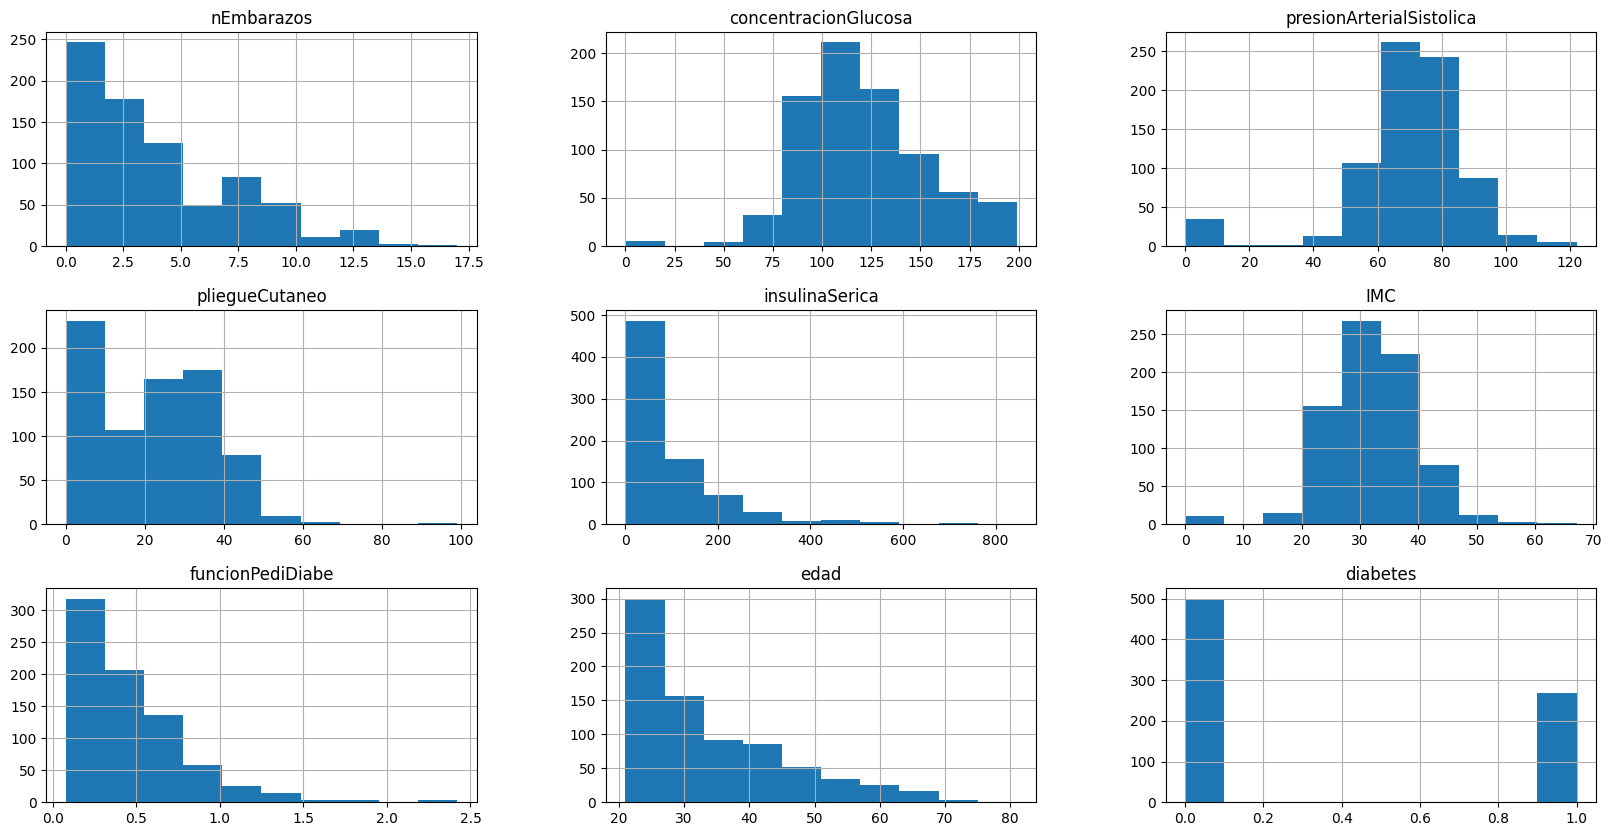

In [28]:
# Dibujar histogramas de todos los atributos

plt.rcParams['figure.figsize'] = [20, 10];
df_base.hist()
plt.show()


### 2.2 Información del Dataset

In [29]:
# Información estadistica de los campos cuantificables (Numericos) del Dataframe
df_base.describe()

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
# Mostramos los primeros 20 registros del Dataframe
df_base.head(20)

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


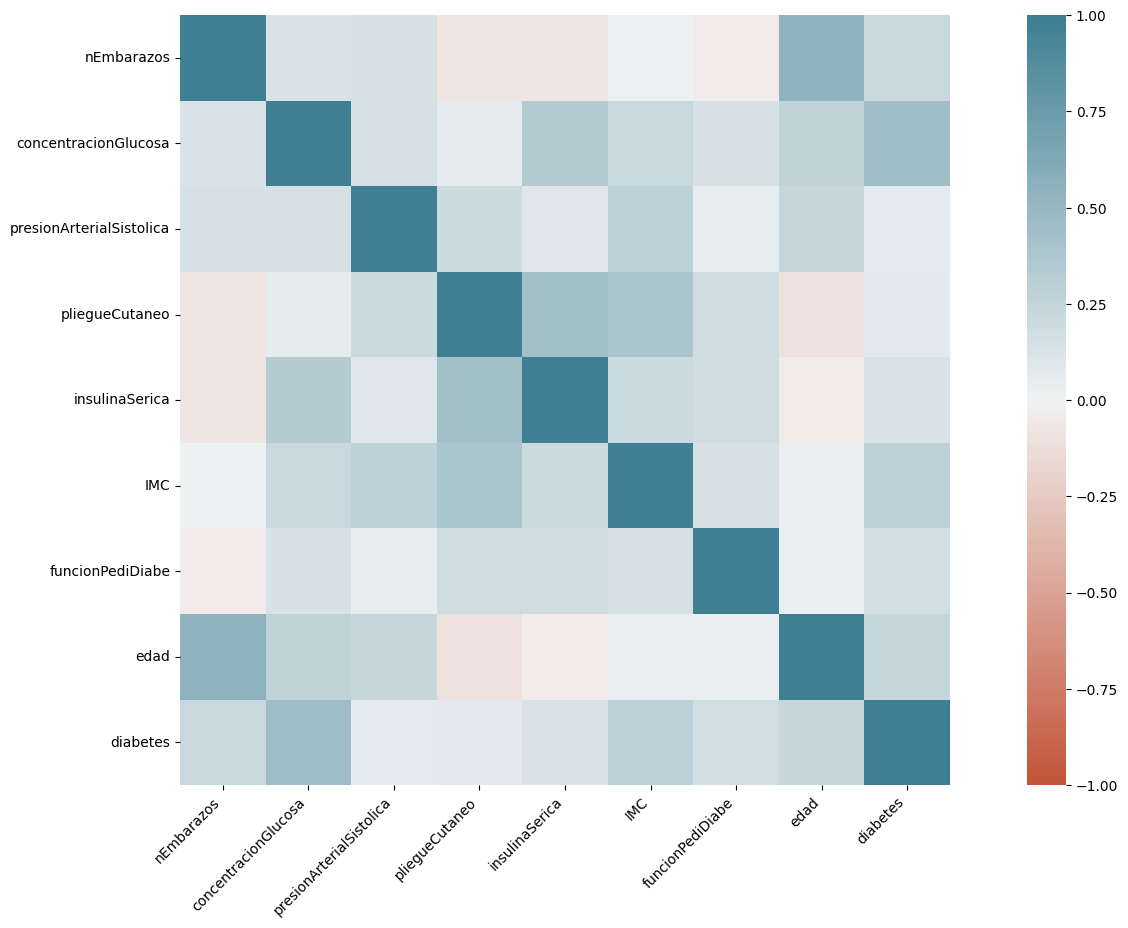

In [31]:
# Creamos un mapa de calor con la correlación de los datos
corr= df_base.corr()
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## 3. Tratamiento de missing. 

### Consideraciones Previas

Antes de realizar cualquier evaluación sobre los datos es importante siempre realizar un tratamiento previo con el fin de abordar el problema de los datos faltantes. Se citan algunos ejemplos: 
* Si la cantidad de datos faltantes es muy grande se recomienda borrar estas variables. Para esta desición tambien se debe considerar el tamaño de la base. 
* Si existe una cantidad pequeña de filas con datos faltantes en sus variables se puede optar por borrarlas.
* Para variables categóricas se puede agregar un estado adicional que describa este factor.
* Se puede llenar los datos faltantes con la media, mediana o moda de la variable tanto para variables numéricas o categóricas.
* Para variables categóricas, se puede optar por una asignación aleatoria de categorías escogiendo aquellas que se encuentren presentes en esa variable, tratado de buscar que se encuentren uniformemente distribuidas.
* En ocasiones no existen valores faltantes o nulos, existen valores en cero que realmente están reflejando datos faltantes. 

### Se obtiene las columnas que tienen datos faltantes.

In [35]:
# Generamos un dataframe que generan la sumatoria de valores nulos
col_total_nulos = df_base.isnull().sum()

# Seleccionamos las columnas que poseen más de un valor nulo
serie_col_nombres = col_total_nulos[col_total_nulos > 0]

# Mostramos las columnas
display(serie_col_nombres)

Series([], dtype: int64)

**No existen valores faltantes**

### Revisar valores en cero

Si observamos el resultado del describe del análisis exploratorio de los datos, podemos ver que hay muchas columnas con valor mínimo en cero. Y no tiene mucho sentido, así que se trata de valores faltantes. Las siguientes columnas no deben tener valor en cero.

* Concentración de Glucosa
* Presión arterial diastólica
* Pliegue cutáneo en triceps
* Insulina sérica
* Indice de Masa Corporal IMC.

Si vemos las 20 primeras filas del análisis exploratorio de los datos, podemos ver ceros en la columna 3, 4 y 5. Contemos ahora los ceros que existen en cada columna del dataset.

In [38]:
# Sumemos los ceros por columna
(df_base==0).sum(axis=0)

nEmbarazos                  111
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                    500
dtype: int64

Podemos ver que las columnas 2,3 y 6 tienen pocas filas con valores en cero. Pero las columnas 4 y 5 casi la mitad de los datos están en cero. Así que necesitaremos diferentes estrategias para poder llenar los valores faltantes. 

## 4. Manejo de valores faltantes

### 4.1. Reemplazar ceros con valores 'NAN':

**¿Qué es un NaN?**

NaN es una abreviatura de "Not a Number" (No es un número en español). Es un valor especial que se utiliza para representar valores numéricos que no son números válidos. Por ejemplo, el resultado de una división por cero o una operación matemática que no tiene sentido.

¿Por qué aparecen los NaN?

Los NaN pueden surgir en diversos contextos:
* Datos faltantes: Cuando un valor numérico no está disponible o se ha perdido, se suele reemplazar por NaN.
* Operaciones matemáticas inválidas: Como mencioné, divisiones por cero o raíces cuadradas de números negativos generan NaN.
* Conversiones de tipos de datos: Al convertir un valor de un tipo de dato a otro (por ejemplo, de texto a numérico), pueden ocurrir errores y generar NaN si la conversión no es posible.

¿Por qué son importantes los NaN?

Los NaN pueden causar problemas en los análisis de datos si no se tratan adecuadamente. Pueden afectar el cálculo de estadísticas, la visualización de datos y la toma de decisiones basadas en esos datos.

In [42]:
# Reemplazar '0' con valores 'nan' para los atributos: concentracionGlucosa, presionArterialSistolica, pliegueCutaneo, insulinaSerica e IMC

# Creamos una lista con el detalle de las columnas a modificar
cols=['concentracionGlucosa','presionArterialSistolica','pliegueCutaneo','insulinaSerica','IMC'] 

# Reemplazamos 0 y '0' por NaN, usamos ambos reemplazos para evitar omitir el uso como texto.
df_base[cols] = df_base[cols].replace({'0':np.nan, 0:np.nan})

# Contar el número de NaN por columna
print(df_base.isnull().sum())


nEmbarazos                    0
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                      0
dtype: int64


**Eliminar filas con valores faltantes**

La estrategia más sencilla para manejar los datos faltantes es eliminar los registros que contienen un valor perdido.

Podemos hacer esto creando un nuevo Pandas DataFrame con las filas que contienen los valores faltantes

Pandas proporciona la función dropna () que se puede utilizar para eliminar columnas o filas con datos faltantes. Podemos usar dropna () para eliminar todas las filas con datos faltantes, de la siguiente manera:

In [44]:
# Hacemos una copia del Dataframe para evitar afectar el que contiene la carga
df_base_missing_dropn = df_base.copy()

# Revisar cuántas filas y columnas tiene df_base_missing_dropn
print(df_base_missing_dropn.shape)


(768, 9)


### 4.2. Eliminar filas con valores faltantes

dropna() en Pandas ofrecen un gran nivel de control sobre cómo se eliminan los valores NaN de un DataFrame.

Parámetros principales:

1. how:
    * 'any' (por defecto): Elimina las filas o columnas que contienen al menos un NaN.
    * 'all': Elimina las filas o columnas que solo contienen NaN.
2. axis:
    * 0 o 'index': Elimina filas con valores NaN.
    * 1 o 'columns': Elimina columnas con valores NaN.
3. thresh: Un entero que especifica el número mínimo de valores no NaN que una fila o columna debe tener para no ser eliminada.
4. subset: Una lista de etiquetas de columnas. Solo considera los valores NaN en estas columnas específicas para decidir qué filas o columnas eliminar.
5. inplace: Si es True, modifica el DataFrame en su lugar; si es False (por defecto), devuelve una copia modificada.
6. limit: Un entero que especifica el número máximo de valores consecutivos NaN a eliminar en una fila o columna.

In [45]:
# Ejecutamos dropna para eliminar registros con NaN
df_base_missing_dropn = df_base_missing_dropn.dropna()

print(df_base_missing_dropn.shape)

(392, 9)


### 4.3 Eliminar columnas con un % de valores faltantes
Se eliminara aquellas columnas que tienen un % de nulos mayor a un parámetro definido previamente.

In [46]:
# Ejecutamos una copia del Dataframe para no afectar la carga original
df_base_missing_dropnColumns = df_base.copy()

# Generamos una variable que almacene el porcentaje maximo de faltantes que podra tener de NaN una columna
perc = 25.0 # mayor al 25% de valores faltantes

# Cálculo del número mínimo de valores faltantes, lo que se busca es indicar la cantidad de valores NaN que son permitidos en una columna.
min_count =  int(((100-perc)/100)*df_base_missing_dropnColumns.shape[0] + 1)

# Ejecutamos la eliminaci[on de las columnas que superen el minimos de NaN. 
# el parametro thresh especifica el número mínimo de valores no NaN se debe tener para no ser eliminada
df_base_missing_dropnColumns = df_base_missing_dropnColumns.dropna( axis=1, thresh=min_count)

In [47]:
# Revisamos las nuevas dimensiones del Dataframe
df_base_missing_dropnColumns.shape

(768, 7)

In [48]:
# Se elimina Insulina y pliegue
df_base_missing_dropnColumns.head(20)

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,IMC,funcionPediDiabe,edad,diabetes
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
5,5,116.0,74.0,25.6,0.201,30,0
6,3,78.0,50.0,31.0,0.248,26,1
7,10,115.0,NaN,35.3,0.134,29,0
8,2,197.0,70.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,0.232,54,1


### 4.4 Reemplazar valores faltantes con la media

In [51]:
# Ejecutamos una copia del Dataframe para no afectar la carga original
df_base_missing_mean=df_base.copy()

# Mostramos el dataframe
df_base_missing_mean

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [52]:
# Reemplazaremos los valores NaN haciendo uso de mask
df_base_missing_mean = df_base_missing_mean.mask(df_base_missing_mean.isna(), df_base_missing_mean.mean().round(), axis=1)

# Mostramos el Dataframe
df_base_missing_mean

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,156.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,156.0,30.1,0.349,47,1


La función mask en Pandas se utiliza para reemplazar valores en un DataFrame o Serie basándose en una condición. Esta condición se representa a través de una máscara booleana. Los parámetros principales de esta función son:

Parámetros principales:
cond: Una condición booleana que determina qué valores se reemplazarán. Puede ser un escalar, un array o un DataFrame del mismo tamaño que el objeto en el que se aplica la función.
other: El valor que reemplazará a los elementos donde la condición cond es True. Puede ser un escalar, un array o un DataFrame del mismo tamaño.

### 4.5 Reemplazar valores faltantes con la moda

In [53]:
df_base_missing_mode = df_base.copy()
df_base_missing_mode

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [54]:
# Realizamos el reemplazo. 
df_base_missing_mode = df_base_missing_mode.mask(df_base_missing_mode.isna(), df_base_missing_mode.mode().iloc[0], axis=1)
# indicando iloc[0] seleccionamos el primer valor de la moda. por definicion la moda puede ser mas de un valor.

# Mostramos el dataframe con la sustitucion
df_base_missing_mode

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148.0,72.0,35.0,105.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,105.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,105.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,105.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,105.0,30.1,0.349,47,1


### 4.6 Reemplazar valores faltantes con una función de interpolación, usando método lineal

La interpolación lineal es una técnica matemática utilizada para estimar valores desconocidos que se encuentran dentro del rango de un conjunto de datos conocidos. Este método asume que los cambios entre los puntos conocidos se producen de manera lineal, es decir, a lo largo de una línea recta. Toma el valor anterior y el valor siguiente para sacar el promedio entre ellos para identificar el valor

In [57]:
df_base_missing_interpo=df_base.copy()
df_base_missing_interpo

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [58]:
# Realizamos el reemplazo de valores
df_base_missing_interpo = df_base_missing_interpo.interpolate(method='linear', limit_direction='both')

# Mostramos el dataframe
df_base_missing_interpo

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148.0,72.0,35.0,94.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31,0
2,8,183.0,64.0,26.0,94.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,146.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,27.0,112.0,30.1,0.349,47,1


## 5. Correlaciones existentes entre las variables numéricas del conjunto de datos.

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
nEmbarazos,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
concentracionGlucosa,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
presionArterialSistolica,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
pliegueCutaneo,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
insulinaSerica,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
IMC,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
funcionPediDiabe,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
edad,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
diabetes,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


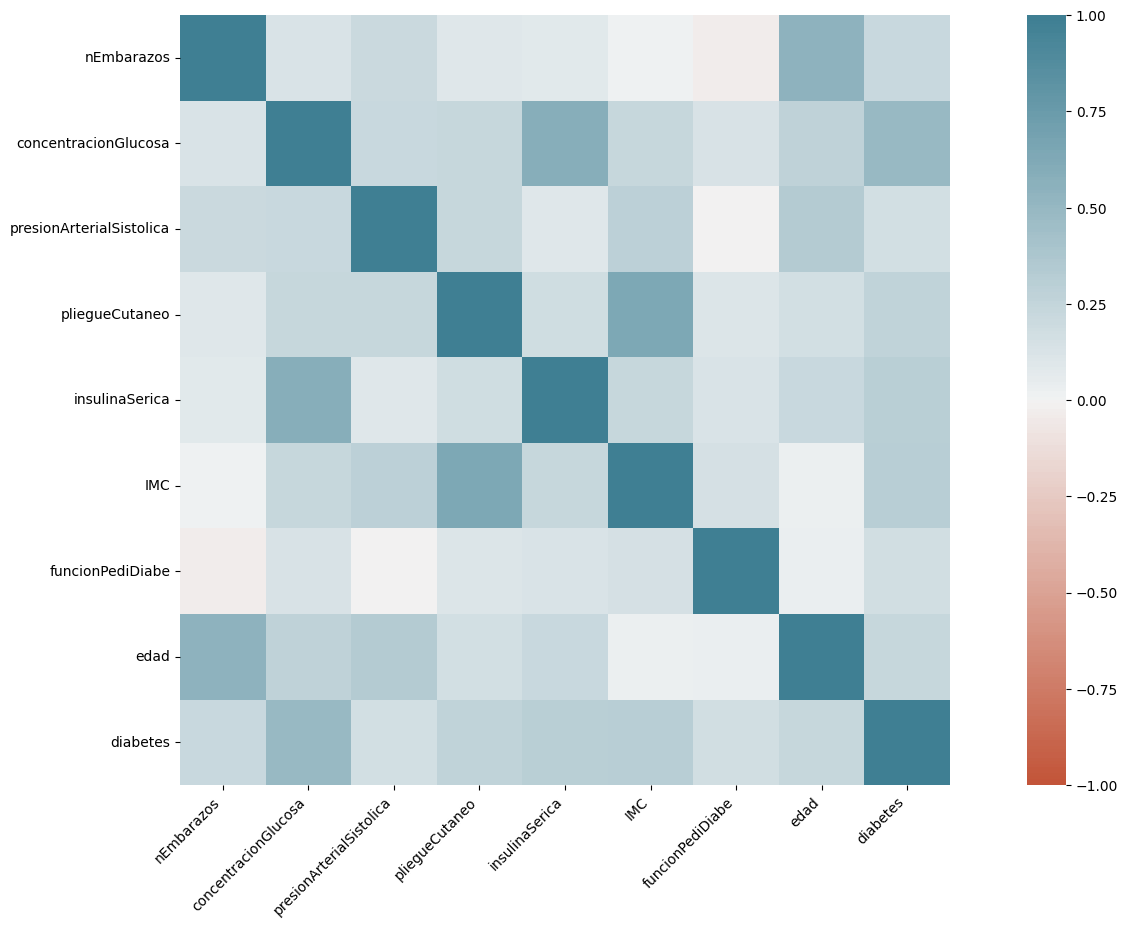

In [59]:
# Mostramos las correlaciones
corr = df_base.corr()
display(corr)

# Mapa de calor
ax = sb.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


## 6. Aplicar Árboles de Decisión y Random Forest al dataframe donde se eliminaron todas las filas con valores faltantes

### Determinar el conjunto de modelización y el de validación
* Se segmenta los datos en dos conjuntos uno de entrenamiento con el 80% y de prueba 20% del total de datos respectivamente.

In [40]:
X = df_base_missing_dropn.drop(columns = ['diabetes']).copy()
y = df_base_missing_dropn['diabetes']

# In the first step we will split the data in training and remaining dataset
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.8, random_state=semilla_aleatoria)


## 6.1. Pasos para aplicar árboles 
## **Escriba el código que permite entrenar un árbol de decisión con el dataset donde se eliminaron las filas con valores faltantes:**

In [49]:
dt_healthy = DecisionTreeClassifier(random_state=semilla_aleatoria, max_depth=15, max_features='sqrt', min_samples_split=1.0)
dt_healthy.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=15, max_features='sqrt', min_samples_split=1.0,
                       random_state=1234)

## **6.2. Escriba el código que permita predecir la diabetes en el conjunto de datos de test:**

In [50]:
predEY_clas_arb = dt_healthy.predict(test_x)
predEY_clas_arb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### MÉTRICAS.
## **6.3. Utilice la función classification_report para poder ver la precisión, recall y f1 tanto para la case 0 como para la clase 1:**

In [51]:
clas_report = classification_report(test_y, predEY_clas_arb)
print(clas_report)

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        55
           1       0.56      0.21      0.30        24

    accuracy                           0.71        79
   macro avg       0.64      0.57      0.56        79
weighted avg       0.68      0.71      0.66        79



## 7. Pasos método Clasificación Random Forest
### Escriba el código que permita entrenar un algoritmo de Random Forest con la función RandomForestClassifier con 100 árboles y que se puedan entrenar 2 árboles en paralelo (n_jobs) y la semilla sea aleatoria.

In [52]:
clas_rndforest = RandomForestClassifier(random_state=semilla_aleatoria, n_estimators=100, n_jobs=2)
clas_rndforest.fit(train_x,train_y)

RandomForestClassifier(n_jobs=2, random_state=1234)

### Predicción del modelo.

In [53]:
predEY_clas_rnd=clas_rndforest.predict(test_x)

## MÉTRICAS.
### **7.1. Utilice la función classification_report para poder ver la precisión, recall y f1 tanto para la case 0 como para la clase 1:**

In [54]:
print(classification_report(test_y, predEY_clas_rnd))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        55
           1       0.64      0.58      0.61        24

    accuracy                           0.77        79
   macro avg       0.73      0.72      0.72        79
weighted avg       0.77      0.77      0.77        79



## 8. Aplicar Árboles de decisión con el dataframe a los que se les imputa valores con una función de interpolación

In [57]:
df_base_missing_interpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nEmbarazos                768 non-null    int64  
 1   concentracionGlucosa      768 non-null    float64
 2   presionArterialSistolica  768 non-null    float64
 3   pliegueCutaneo            768 non-null    float64
 4   insulinaSerica            768 non-null    float64
 5   IMC                       768 non-null    float64
 6   funcionPediDiabe          768 non-null    float64
 7   edad                      768 non-null    int64  
 8   diabetes                  768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [58]:
X = df_base_missing_interpo.drop(columns = ['diabetes']).copy()
y = df_base_missing_interpo['diabetes']

In [59]:
# In the first step we will split the data in training and remaining dataset
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.8, random_state=semilla_aleatoria)

## 8.1. Pasos para aplicar árboles 
### Escriba el código que permita entrenar un algoritmo de árboles de decisión con la función DecisionTreeClassifier.

In [76]:
clas_arboles = DecisionTreeClassifier(max_depth=15, max_features='sqrt', min_samples_split=1.0, random_state=semilla_aleatoria, splitter='best')
clas_arboles.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=15, max_features='sqrt', min_samples_split=1.0,
                       random_state=1234)

### Predicción del modelo.

In [71]:
predEY_clas_arb=clas_arboles.predict(test_x)

## MÉTRICAS.
### **8.2. Utilice la función classification_report para poder ver la precisión, recall y f1 tanto para la case 0 como para la clase 1:**

In [72]:
display(confusion_matrix(test_y,predEY_clas_arb))
class_report = classification_report(test_y, predEY_clas_arb)
print(class_report)

array([[87, 12],
       [36, 19]])

              precision    recall  f1-score   support

           0       0.71      0.88      0.78        99
           1       0.61      0.35      0.44        55

    accuracy                           0.69       154
   macro avg       0.66      0.61      0.61       154
weighted avg       0.67      0.69      0.66       154



## 9. Aplicar Random Forest con el dataframe a los que se les imputa valores con una función de interpolación
### 9.1. Escriba el código que permita entrenar un algoritmo de Random Forest con la función RandomForestClassifier con 100 árboles y que se puedan entrenar 2 árboles en paralelo (n_jobs) y la semilla sea aleatoria.

In [78]:
clas_rndforest = RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=semilla_aleatoria)
clas_rndforest.fit(train_x, train_y)

RandomForestClassifier(n_jobs=2, random_state=1234)

### Predicción del modelo.

In [79]:
predEY_clas_rnd=clas_rndforest.predict(test_x)

## MÉTRICAS.
### 9.2. Utilice la función classification_report para poder ver la precisión, recall y f1 tanto para la case 0 como para la clase 1:

In [80]:
class_report = classification_report(test_y, predEY_clas_rnd)
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.74      0.56      0.64        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154

